# Google Street View
To produce the visual impact assessment, the program uses the Google Street View API to retrieve images from various locations worldwide. This method provides a quick and efficient way of obtaining images from important areas, eliminating the need to dispatch an person physically for photography. While the photo quality may be somewhat lacking, this approach serves as an effective initial strategy for evaluating the visual impact of an adjacent wind park.

In [1]:
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent.parent))
from src.utils import get_api_key, pull_street_view_image, print_code
import numpy as np
from IPython.display import display
from IPython.core.display import HTML
from PIL import Image

## Street View API
To access to images, a Google Street View API key is needed. The program should automatically prompt the user for a key the first time to program is executed. Elsewise, the api key is loaded for the text document `/assest/api_key.txt`.

In [2]:
HTML(print_code(pull_street_view_image))

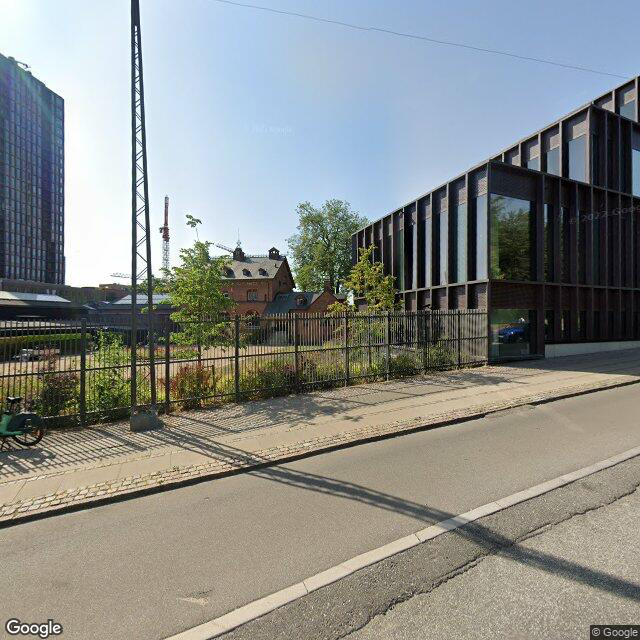

In [3]:
api_key = get_api_key()
longitude = 12.5298105
latitude = 55.6675831
pull_street_view_image(api_key, longitude, latitude, fov = 90, heading = 180, pitch = 90, width = 400, height = 400)

### Further development
Currently, the program is constrained to generating square 400x400 images. Nonetheless, for upcoming updates, it is straightforward to merge multiple Google Street View images, thereby creating a significantly broader field of view and attaining higher image resolution in terms of height.

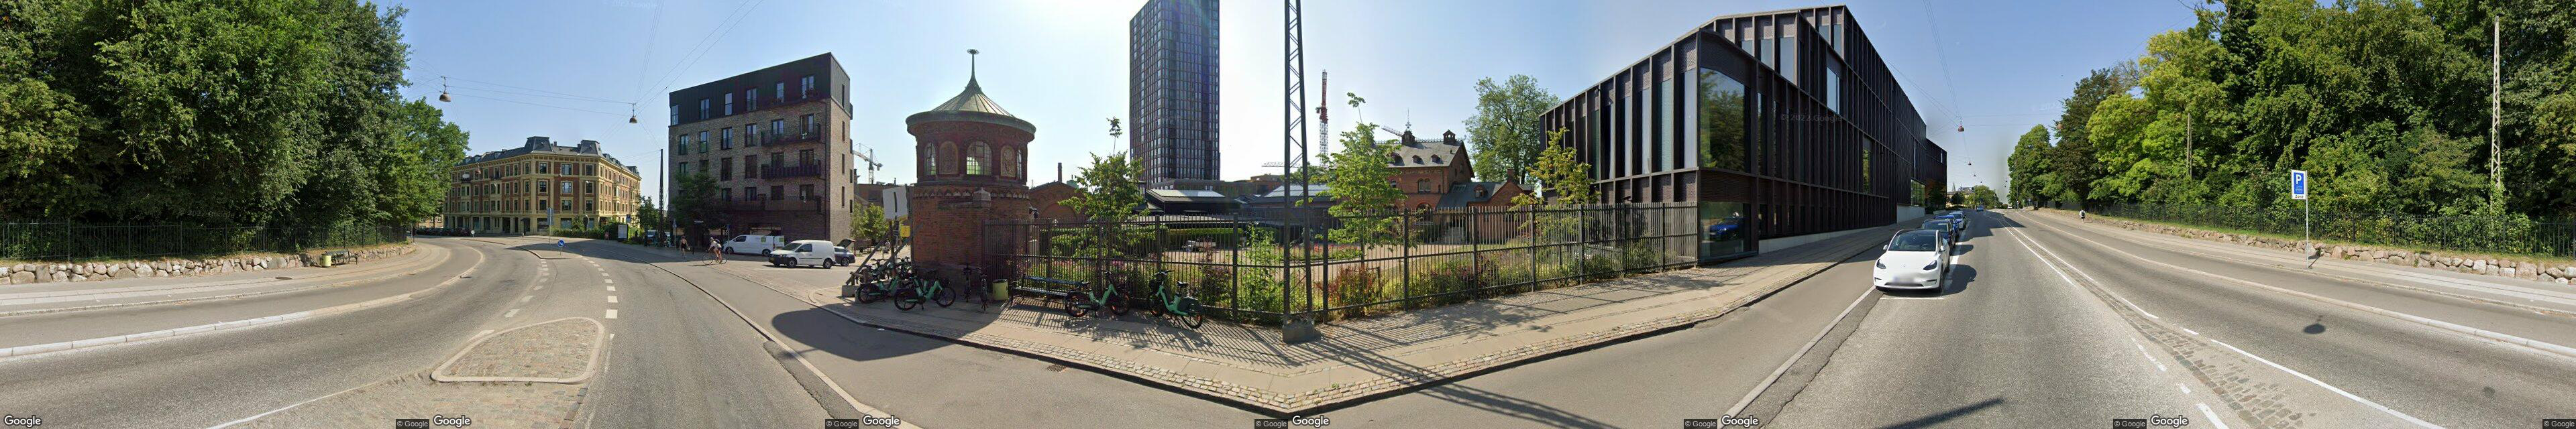

In [4]:
fov = 60
headings = np.arange(0, 360, fov)
image_list = []
for heading in headings:
    new_image = pull_street_view_image(api_key, longitude, latitude, heading=heading, fov = fov)
    
    # Append the new image to the list
    image_list.append(new_image)

# Calculate the total width needed for the final image
total_width = sum([img.width for img in image_list])
max_height = max([img.height for img in image_list])

# Create a blank canvas for the final image
final_image = Image.new('RGB', (total_width, max_height))

# Paste each image onto the final image
x_offset = 0
for img in image_list:
    final_image.paste(img, (x_offset, 0))
    x_offset += img.width

# Display or save the final image
display(final_image)